# Quikr Cars Dataset( predicting the price )
- Finding the data to clean and cleaning it
- Dividing into Features and Target
- splitting into train test 
- Creating a model 
- predicting the values
- adjusting the train test split to get max accuracy

In [1]:
import pandas as pd
import numpy as np

# Importing the csv file
car = pd.read_csv('quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# Data to Clean

- In NAME variable we only want the starting 3 word rest is of no use
- fuel type has nan  
- year has non-year value and datatype is object
- kms_driven has 'kms' at the end and dtype is object with 2 rows of 'petrol' as value
- price has string 'ask for price' and dtype is object

In [2]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
name          892 non-null object
company       892 non-null object
year          892 non-null object
Price         892 non-null object
kms_driven    840 non-null object
fuel_type     837 non-null object
dtypes: object(6)
memory usage: 41.9+ KB


## Cleaning The Data

In [3]:
# making a copy of data 
backup = car.copy()

#### taking only the non-null values and changing the dtype to integer .

In [4]:
car = car[car['year'].str.isnumeric()]
car['year']=car['year'].astype(int)

#### removing  'Ask for price' and replacing comma's(,) with spaces ,
#### also changing the datatype .

In [5]:
car=car[car['Price']!='Ask For Price']
car['Price']=car['Price'].str.replace(',','').astype(int)

#### extracting the numbers and replacing the comma with space

In [6]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

#### converting the datatype to numeric

In [7]:
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

In [8]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: int32

#### Removing the Nan value in fuel_type( WE WILL USE THE TILDA(~) TO EXCLUDE THE ROW with Nan )

In [9]:
car = car[~car['fuel_type'].isna()]

#### slicing the name variable 

In [10]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

#### Reseting the index because we have dropped some rows 

In [11]:
car=car.reset_index(drop=True)

In [12]:
# this will only show the numerical variable ( if u want to see for every variable pass include='all')
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [13]:
# As we can see that the max price is more than 85lakhs which is a outliers
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [14]:
# So we will only take the price which is less than 66 lakhs
car = car[car['Price']<6e6].reset_index(drop=True)

In [15]:
car.shape

(815, 6)

In [16]:
# To save the cleaned data into file
car.to_csv('cleaned_data_car.csv')

# Visualizing the data

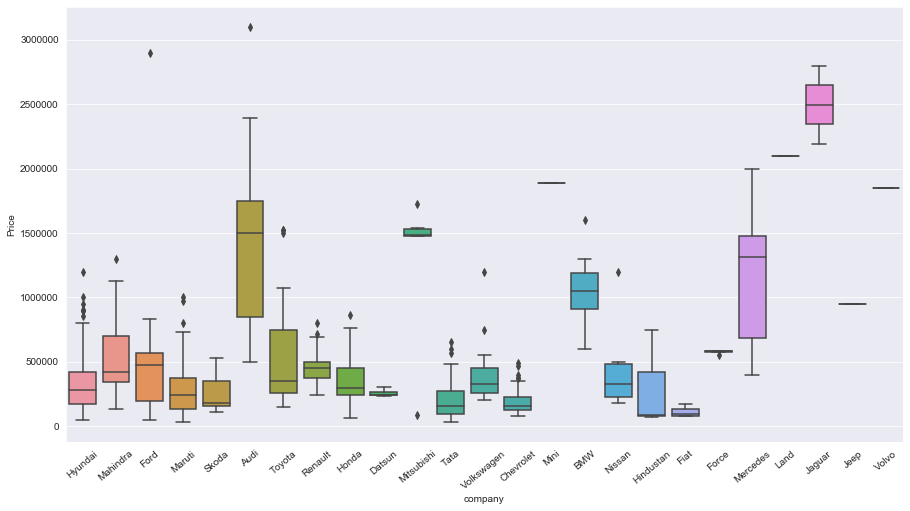

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
ax = sns.boxplot(x='company', y='Price', data = car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()

##### swarm plot 

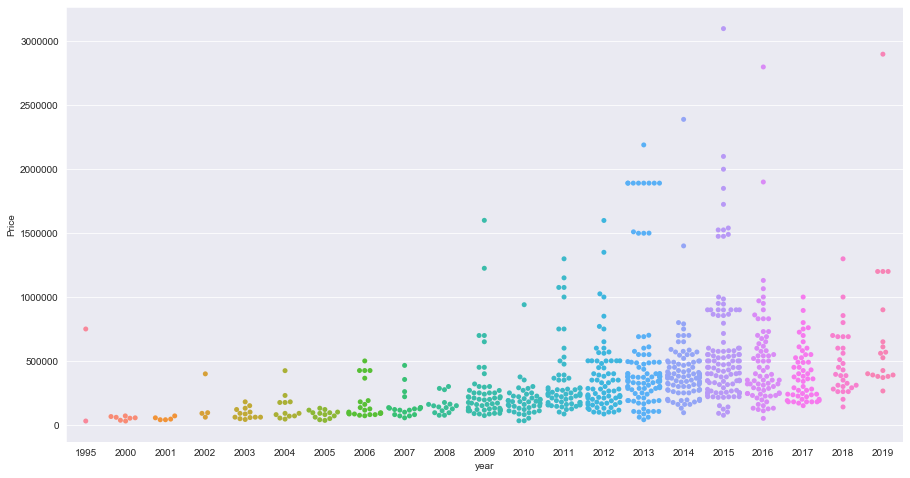

In [58]:
plt.figure(figsize=(15,8))
fig1 = sns.swarmplot(x = 'year', y = 'Price', data = car)

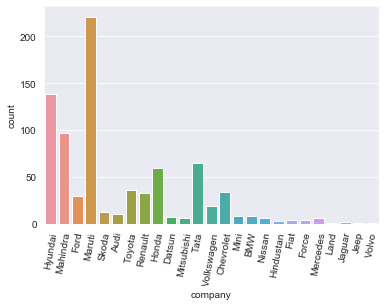

In [74]:
ax1 = sns.countplot(x='company', data = car)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=80)
plt.show()

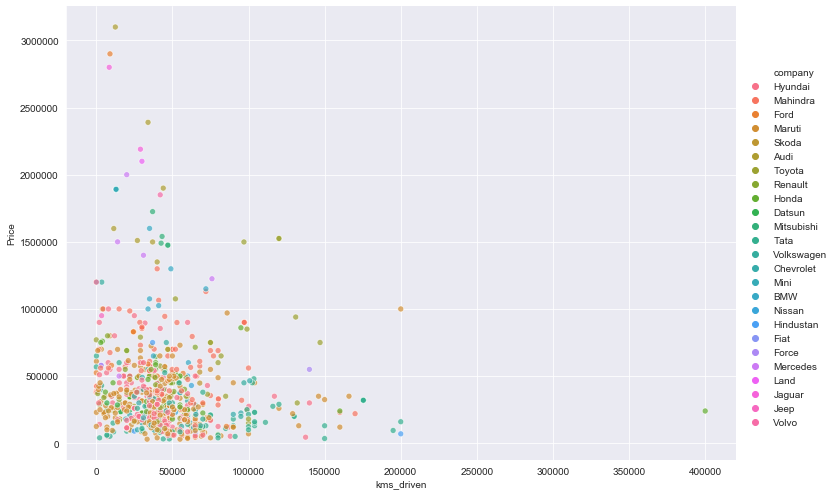

In [85]:
sns.relplot(x='kms_driven', y='Price', data=car, hue='company', height=7, aspect=1.5,
           marker = 'o', alpha=0.7)

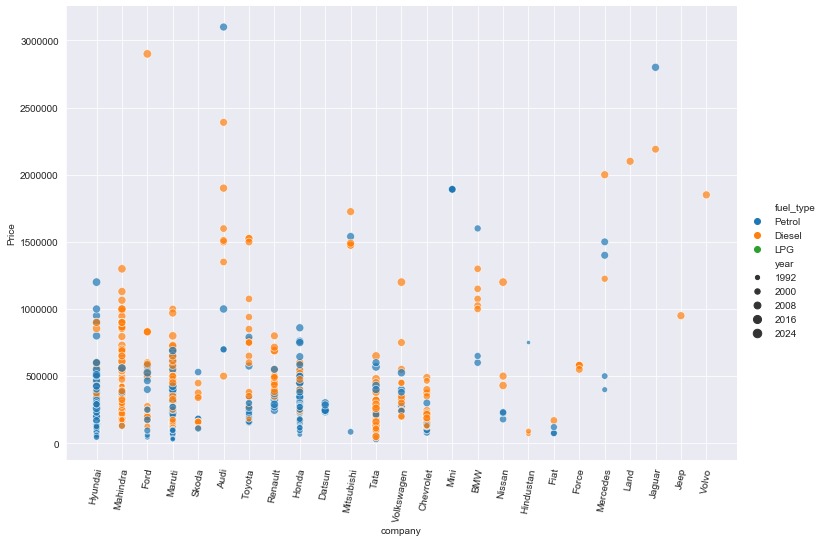

In [87]:
ax2 = sns.relplot(x='company', y='Price', data=car, hue='fuel_type',size = 'year', height=7, aspect=1.5,
           marker = 'o', alpha=0.7)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=80)

## Now our data is cleaned .Therefore we will start building our model

### Splitting the data into Features and Target

In [17]:
X = car.drop(columns='Price')
y = car['Price']

### Splitting into Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Making a model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
# One hot encoder = for splitting the column which contains numerical categorical data to many columns 
#                   depending on the number of categories present in that column

In [20]:
# This estimator allows different columns or column subsets of the input to be transformed separately and 
# the features generated by each transformer will be concatenated to form a single feature space.
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [21]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [23]:
# we have to pass categories or it will through error when predicting on X_test
col_Trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder = 'passthrough')

In [24]:
# Creating a model instance
LR=LinearRegression()

In [25]:
# Passing the model and column Transformer to pipline
pipe = make_pipeline(col_Trans,LR)

In [26]:
# passing input to pipeline and predicting the values
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)

In [27]:
print(r2_score(y_test,pred))

0.552443546595081


#### The R2_score is not so good so, we can change the random state of train test split 

In [30]:
# making an empty list and creating a for loop for 1000 random state 
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    LR=LinearRegression()
    pipe=make_pipeline(col_Trans,LR)
    pipe.fit(X_train,y_train)
    pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,pred))
    


In [31]:
# Getting the random state number with highest r2_score
np.argmax(scores)

661

In [32]:
# Checking the accuracy of random_state = 661
scores[np.argmax(scores)]

0.8897762920578806

In [33]:
# we can pass the above code or the number in random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
LR=LinearRegression()
pipe=make_pipeline(col_Trans,LR)
pipe.fit(X_train,y_train)
pred=pipe.predict(X_test)
r2_score(y_test, pred)

0.8897762920578806

In [34]:
# passing a single row of new data to check the price
pipe.predict(pd.DataFrame([['Mahindra TUV300 T4','Mahindra',2017,35000,'Diesel']],
                          columns=['name','company','year','kms_driven','fuel_type']))

array([620348.70577194])